# Capturing Sentimental Opinions on Presidential Candidates

In this project, we'll aim to capture the opinions and sentiments of a sample of electoral voters. We'll do this by analyzing their tweets on a daily basis over a period of time to see how these opinions are varying or changing over time. 

Can analyzing sentiments of tweets from a sample during a given period provide insight to how an election will swing? The main goal of the project is to examine and analyze tweets containing reference to candidates vying for a presidential spot, classify these tweets into positive, negative or neutral sentiments and from these, try to conclude on how much online sentiments provide for a good indicator to predict the results of an election.

## Training Data Set 

The data set we used in this project is the Sentiment140 dataset. You can find the data set [here](http://help.sentiment140.com/for-students). 

## Exploring the Data Set 

Below we'll do a quick exploration of the data set to find irregularities and understand the composition of the data.

### What questions should we try to answer while looking at the data? (Please add ideas)
1. How many positive/negative records do we have?
2. Are there null/empty records?
3. Do we really need all the columns? Which features are important?
4. The text column, do we need @usernames, RTs, and any unnecessary text?
5. Are we taking neutral records into consideration or just positives and negatives?
6. Do we take into consideration tweets that contain e.g "I wish", "I hope" (without comparison these tweets might be deemed neutral, otherwise positive or negative).
7. How do we plan to prepare data to prevent bias? (i.e Ratio of positive to negative tweets), to prevent the model from being biased towards the seniment with the higher ratio?

In [1]:
import pandas as pd
import numpy as np
dataset = "./dataset/training.1600000.processed.noemoticon.csv"
cols = ['sentiment', 'id', 'date', 'query', 'username', 'text']
df = pd.read_csv(dataset, header=None, names=cols, encoding='latin-1')
df.head(10)

,sentiment,id,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [2]:
df.describe()

,sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


### Question 1:
There are 1.6 million records and 6 columns

In [3]:
df.shape

(1600000, 6)

In [4]:
df.index

RangeIndex(start=0, stop=1600000, step=1)

In [5]:
df.columns

Index(['sentiment', 'id', 'date', 'query', 'username', 'text'], dtype='object')

### Question 2:
There are no null values in the dataset

In [6]:
df.isnull().sum()

sentiment    0
id           0
date         0
query        0
username     0
text         0
dtype: int64

### Question 3:
The columns id, date, query and username will not be useful in the training of the data so we will get rid of them

In [7]:
del df['id']

In [8]:
del df['date']

In [9]:
del df['query']

In [10]:
del df['username']

In [11]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [12]:
df.shape

(1600000, 2)

### Question 4: Data Cleaning
Cleaning up the text column

Some of the text in the text column is beyond the character limit of twitter (140 as at the time of collection of the dataset). This means there are some unnecessary characters that have been introduced while creating/collecting the dataset.

In [13]:
df['textlength'] = [len(t) for t in df.text]
df[df.textlength > 140].head(10)

,sentiment,text,textlength
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


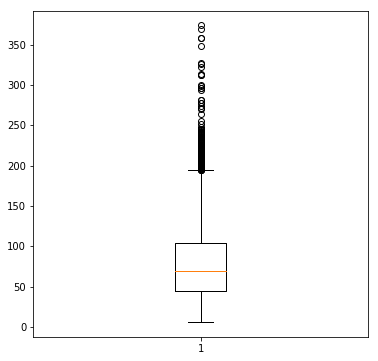

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
plt.boxplot(df.textlength)
plt.show()

Just defining a dictionary to define the dataset we now have

In [15]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'textlength':{
        'type':df.textlength.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')},
 'textlength': {'description': 'Length of the tweet before cleaning',
                'type': dtype('int64')}}


#### HTML Decoding 

In [16]:
df.text[492]

"pears &amp; Brie, bottle of Cabernet, and &quot;Win a Date With Tad Hamilton&quot;... oh gawwd my life flashed forward to when I'm 40 with my 75 cats "

In [17]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[492], 'lxml')
print (example1.get_text())

pears & Brie, bottle of Cabernet, and "Win a Date With Tad Hamilton"... oh gawwd my life flashed forward to when I'm 40 with my 75 cats 


#### Removing @ Mentions

In [18]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [19]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

#### Removing URL Links

In [20]:
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [21]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

#### UTF8-Byte Order Mark

In [22]:
df.text[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [23]:
df.text[226].replace(u"ï¿½", "`")

'Tuesday`ll start with reflection `n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

#### Hashtag/Numbers

In [24]:
df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [25]:
re.sub("[^a-zA-Z']", " ", df.text[175])

" machineplay I'm so sorry you're having to go through this  Again    therapyfail"

#### Putting it all together

In [26]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()
testing = df.text[:100]

test_result = []
for t in testing:
    test_result.append(tweet_cleaner_updated(t))
test_result

['awww that bummer you shoulda got david carr of third day to do it',
 'is upset that he can not update his facebook by texting it and might cry as result school today also blah',
 'dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it not behaving at all mad why am here because can not see you all over there',
 'not the whole crew',
 'need hug',
 'hey long time no see yes rains bit only bit lol fine thanks how you',
 'nope they did not have it',
 'que me muera',
 'spring break in plain city it snowing',
 'just re pierced my ears',
 'could not bear to watch it and thought the ua loss was embarrassing',
 'it it counts idk why did either you never talk to me anymore',
 'would ve been the first but did not have gun not really though zac snyder just doucheclown',
 'wish got to watch it with you miss you and how was the premiere',
 'hollis death scene will hurt me severely to watch on film wry is directors cut no

In [27]:
lengthofrecords = 1600000
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(0,lengthofrecords):
    if( (i+1)%100000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, lengthofrecords ))                                                                    
    clean_tweet_texts.append(tweet_cleaner_updated(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 100000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 300000 of 1600000 has been processed
Tweets 400000 of 1600000 has been processed
Tweets 500000 of 1600000 has been processed
Tweets 600000 of 1600000 has been processed
Tweets 700000 of 1600000 has been processed


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 800000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 1000000 of 1600000 has been processed
Tweets 1100000 of 1600000 has been processed
Tweets 1200000 of 1600000 has been processed


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \\../  \\../'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 1300000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1600000 of 1600000 has been processed


In [28]:
mytweets = []
for sentence in clean_tweet_texts:
    newsentence = re.sub("\s'\s", "'", sentence)
    mytweets.append(newsentence)
mytweets[:10]

['awww that bummer you shoulda got david carr of third day to do it',
 'is upset that he can not update his facebook by texting it and might cry as result school today also blah',
 'dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it not behaving at all mad why am here because can not see you all over there',
 'not the whole crew',
 'need hug',
 'hey long time no see yes rains bit only bit lol fine thanks how you',
 'nope they did not have it',
 'que me muera']

In [29]:
clean_df = pd.DataFrame(mytweets,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [42]:
mynegdict = {}
negative_tweets = clean_df[clean_df.target == 4]
for tweets in negative_tweets.text:
    for word in tweets.split(" "):
        if word not in mynegdict:
            mynegdict[word] = 1
        else:
            mynegdict[word] += 1
print(sorted(mynegdict.items(), key=lambda x: x[1], reverse=True))
print(negative_tweets.text[:10])

[('the', 265998), ('to', 252567), ('you', 198245), ('and', 149642), ('it', 147786), ('my', 125955), ('for', 117369), ('is', 111191), ('in', 101160), ('of', 91098), ('not', 86861), ('on', 84195), ('that', 83068), ('me', 71591), ('so', 65607), ('have', 65582), ('with', 65180), ('just', 62944), ('good', 62118), ('be', 54480), ('at', 49622), ('but', 48597), ('do', 48483), ('day', 48186), ('love', 47694), ('was', 47099), ('are', 45044), ('your', 44541), ('this', 41565), ('up', 41542), ('can', 41462), ('all', 41429), ('now', 41376), ('out', 38390), ('like', 37520), ('get', 36557), ('lol', 36118), ('we', 35275), ('thanks', 34375), ('will', 31801), ('going', 30939), ('time', 30432), ('today', 30100), ('what', 30046), ('go', 28377), ('too', 28224), ('from', 28161), ('got', 28037), ('new', 26939), ('some', 26706), ('one', 26683), ('see', 25811), ('know', 25747), ('great', 25310), ('if', 24902), ('ll', 24611), ('about', 24320), ('back', 23869), ('am', 23784), ('night', 23722), ('how', 23366), ('w

In [63]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from collections import Counter

def get_pos( word ):
    w_synsets = wordnet.synsets(word)

    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in w_synsets if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in w_synsets if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in w_synsets if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in w_synsets if item.pos()=="r"]  )
    
    most_common_pos_list = pos_counts.most_common(3)
    return most_common_pos_list[0][0] # first indexer for getting the top POS from list, second indexer for getting POS from tuple( POS: count )



porter_stemmer = PorterStemmer()
lema = WordNetLemmatizer()
lema.lemmatize(clean_df.text[8], get_pos(clean_df.text[8]))


'nope they did not have it'

In [30]:
clean_df.to_csv('clean_tweet.csv', index=False, encoding='latin-1')

In [31]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv)
my_df.shape

(1600000, 2)

In [32]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596041 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [33]:
my_df.isnull().any(axis=0)

text       True
target    False
dtype: bool

### Question 5 and 7:
The dataset we will use for the training doesn't have neutral sentiments, only (0 - negative and 4 - positive) So we will just work with positives and negatives. Since the dataset is balanced between the two classes (800,000), bias shouldn't be a problem

In [34]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

### Question 6:
True without further context, tweets with those terms will be deemde neutral but the model has to take the whole context of the sentence/tweet into consideration before classifying into positive or negative.
E.g. I hope Buhari doesn't become president again = Negative
     I wish I had been more accepting of Atiku = Positive